In [4]:
data_dir="/Users/michellehu/git_dirs/ComplexSystems_AMATH563/data/"

In [32]:
# Download data if you haven't already
import os
gz_fns=["t10k-labels-idx1-ubyte.gz", "t10k-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz", "train-images-idx3-ubyte.gz"]
data_paths=[data_dir + gz for gz in gz_fns]
data_sources=["http://yann.lecun.com/exdb/mnist/" + gz for gz in gz_fns]
data_sources
for f, source in zip(data_paths, data_sources):
    if os.path.exists(f):
        print("Exists!")
    else:
        print("Missing", f)
        print("Downloading now...")
        !wget -O $f $source

Missing /Users/michellehu/git_dirs/ComplexSystems_AMATH563/data/t10k-labels-idx1-ubyte.gz
--2020-04-02 15:00:00--  http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 2606:4700:3031::681c:6cc, 2606:4700:3033::681c:7cc, 104.28.7.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|2606:4700:3031::681c:6cc|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4542 (4.4K) [application/x-gzip]
Saving to: ‘/Users/michellehu/git_dirs/ComplexSystems_AMATH563/data/t10k-labels-idx1-ubyte.gz’

/Users/michellehu/g 100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-04-02 15:00:01 (167 MB/s) - ‘/Users/michellehu/git_dirs/ComplexSystems_AMATH563/data/t10k-labels-idx1-ubyte.gz’ saved [4542/4542]

Missing /Users/michellehu/git_dirs/ComplexSystems_AMATH563/data/t10k-images-idx3-ubyte.gz
--2020-04-02 15:00:01--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 26

In [6]:
# From https://github.com/daniel-e/mnist_octave/blob/master/mnist.py
import struct, gzip
import scipy.io
import numpy as np

def loadY(fnlabel):
    f = gzip.open(fnlabel, 'rb')
    f.read(8)
    return np.frombuffer(f.read(), dtype = np.uint8)

def loadX(fnimg):
    f = gzip.open(fnimg, 'rb')
    f.read(16)
    return np.frombuffer(f.read(), dtype = np.uint8).reshape((-1, 28*28))

In [34]:
# Unzip, reformat and reshape
trainX = loadX(data_dir+"train-images-idx3-ubyte.gz")
trainY = loadY(data_dir+"train-labels-idx1-ubyte.gz")
testX = loadX(data_dir+"t10k-images-idx3-ubyte.gz")
testY = loadY(data_dir+"t10k-labels-idx1-ubyte.gz")

In [42]:
# double check that these reshapings make sense
print(trainX[0].shape)
print(trainX[0].reshape(28,28).shape)
print("28*28 =", 28*28)

(784,)
(28, 28)
28*28 = 784


In [44]:
# Check sizes of train and test datasets and labels
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [45]:
# Look at class distribution
# http://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(trainY))
print('Class distribution: %s' % np.bincount(trainY))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [59]:
# https://www.python-course.eu/neural_network_mnist.php
# Turn labels in one-hot representation
lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

<class 'int'>
label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
<class 'int'>
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
<class 'int'>
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
<class 'int'>
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
<class 'int'>
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
<class 'int'>
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
<class 'int'>
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
<class 'int'>
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
<class 'int'>
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
<class 'int'>
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


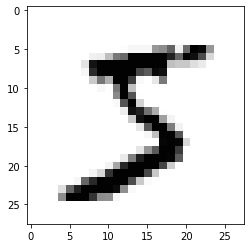

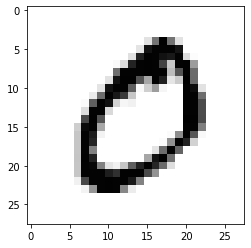

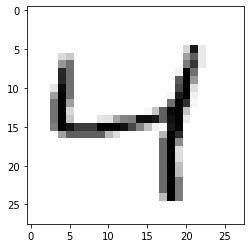

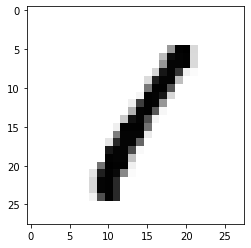

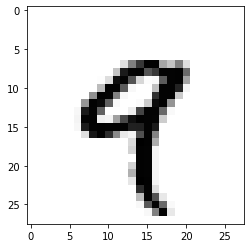

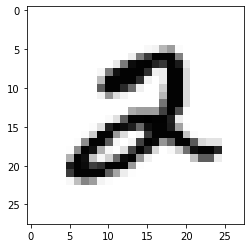

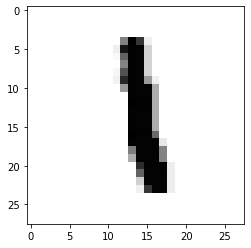

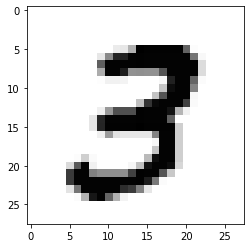

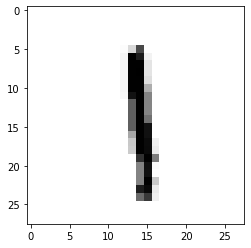

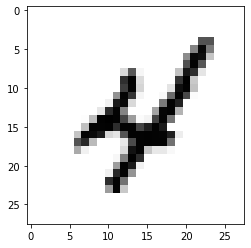

In [19]:
import matplotlib.pyplot as plt
for i in range(10):
    img = trainX[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [55]:
# Convert labels to float type
train_labels = np.asfarray(trainY)
test_labels = np.asfarray(testY)

In [70]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
print(image_pixels)

lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels.reshape(60000,1)).astype(np.float)
test_labels_one_hot = (lr==test_labels.reshape(10000,1)).astype(np.float)

# we don't want zeroes and ones in the labels:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

784


In [73]:
# Pickling for faster load (probably unecessary right now)
import pickle

with open(data_dir+"pickled_mnist.pkl", "bw") as fh:
    data = (trainX, 
            testX, 
            trainY,
            testY,
            train_labels_one_hot,
            test_labels_one_hot)
    pickle.dump(data, fh)

In [74]:
!ls $data_dir

pickled_mnist.pkl	   train-images-idx3-ubyte
t10k-images-idx3-ubyte	   train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz  train-labels-idx1-ubyte
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz
